In [9]:
import pandas as pd
from constants import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec


In [10]:
fname = "data/ev_sales/BEV-PHEV-HEV-FCEV Sales By State for 2011-2021-EVAdoption.xlsx"
sample_df = pd.read_excel(fname, sheet_name = '2013')

In [30]:
start_year = 2013
end_year = 2022
read_cols = ["State", "FCEV Sales", "BEV Sales", 'BEV Market Share', "PHEV Sales"]
df = pd.DataFrame(columns=read_cols)
for year in range(start_year, end_year):
    filter_cols = ["{} {}".format(year, j) if i>0 else j for i, j in enumerate(read_cols)]
    t_df = pd.read_excel(fname, sheet_name="{}".format(year), usecols=filter_cols)
    t_df.columns = read_cols
    t_df['year'] = str(year)
    df = df.append(t_df)

C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_44012\3682252765.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_44012\3682252765.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_44012\3682252765.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_44012\3682252765.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_44012\368225276

In [31]:
df

,State,FCEV Sales,BEV Sales,BEV Market Share,PHEV Sales,year
0,Alabama,0,77,0.0004,99,2013
1,Alaska,0,17,0.0007,26,2013
2,Arizona,0,705,0.0023,544,2013
3,Arkansas,0,24,0.0002,74,2013
4,California,19,20943,0.0129,17512,2013
...,...,...,...,...,...,...
47,Washington,0,17143,0.0696,3637,2021
48,West Virginia,0,390,0.0058,279,2021
49,Wisconsin,0,3011,0.0147,1336,2021
50,Wyoming,0,138,0.0076,128,2021


In [32]:
df['State'] = df['State'].replace("District of Columbia", "District Of Columbia")

In [33]:
epa_region = pd.read_csv("data/states_and_counties.csv")
epa_region = epa_region[['State Name','State Code', "EPA Region"]]
epa_region = epa_region[epa_region['State Code'] != 'CC']
epa_region['State Code'] = epa_region['State Code'].apply(int)
epa_region = epa_region.drop_duplicates(['State Code'], keep='first')
mdf = df.merge(epa_region, left_on="State", right_on="State Name", how='left')

In [34]:
mdf

,State,FCEV Sales,BEV Sales,BEV Market Share,PHEV Sales,year,State Name,State Code,EPA Region
0,Alabama,0,77,0.0004,99,2013,Alabama,1.0,4.0
1,Alaska,0,17,0.0007,26,2013,Alaska,2.0,10.0
2,Arizona,0,705,0.0023,544,2013,Arizona,4.0,9.0
3,Arkansas,0,24,0.0002,74,2013,Arkansas,5.0,6.0
4,California,19,20943,0.0129,17512,2013,California,6.0,9.0
...,...,...,...,...,...,...,...,...,...
463,Washington,0,17143,0.0696,3637,2021,Washington,53.0,10.0
464,West Virginia,0,390,0.0058,279,2021,West Virginia,54.0,3.0
465,Wisconsin,0,3011,0.0147,1336,2021,Wisconsin,55.0,5.0
466,Wyoming,0,138,0.0076,128,2021,Wyoming,56.0,8.0


In [35]:
# mdf['ev_sales'] = mdf["FCEV Sales"] + mdf["BEV Sales"] +  mdf["PHEV Sales"] + mdf["HEV Sales"]
mdf['ev_sales'] =  mdf["FCEV Sales"] + mdf["BEV Sales"] +  mdf["PHEV Sales"] 

mdf['total'] = (mdf['BEV Sales'])/mdf['BEV Market Share'] 
mdf['nonev_sales'] = mdf['total'] - mdf['ev_sales']

In [36]:
mdf

,State,FCEV Sales,BEV Sales,BEV Market Share,PHEV Sales,year,State Name,State Code,EPA Region,ev_sales,total,nonev_sales
0,Alabama,0,77,0.0004,99,2013,Alabama,1.0,4.0,176,192500.0,192324.0
1,Alaska,0,17,0.0007,26,2013,Alaska,2.0,10.0,43,24285.714286,24242.714286
2,Arizona,0,705,0.0023,544,2013,Arizona,4.0,9.0,1249,306521.73913,305272.73913
3,Arkansas,0,24,0.0002,74,2013,Arkansas,5.0,6.0,98,120000.0,119902.0
4,California,19,20943,0.0129,17512,2013,California,6.0,9.0,38474,1623488.372093,1585014.372093
...,...,...,...,...,...,...,...,...,...,...,...,...
463,Washington,0,17143,0.0696,3637,2021,Washington,53.0,10.0,20780,246307.471264,225527.471264
464,West Virginia,0,390,0.0058,279,2021,West Virginia,54.0,3.0,669,67241.37931,66572.37931
465,Wisconsin,0,3011,0.0147,1336,2021,Wisconsin,55.0,5.0,4347,204829.931973,200482.931973
466,Wyoming,0,138,0.0076,128,2021,Wyoming,56.0,8.0,266,18157.894737,17891.894737


In [37]:
total_us_nonev_sales = mdf[mdf['State'] == 'Total US']['nonev_sales'].tolist()[0]
mdf['us_percent'] = (mdf['nonev_sales']*100)/total_us_nonev_sales

In [38]:
mdf

,State,FCEV Sales,BEV Sales,BEV Market Share,PHEV Sales,year,State Name,State Code,EPA Region,ev_sales,total,nonev_sales,us_percent
0,Alabama,0,77,0.0004,99,2013,Alabama,1.0,4.0,176,192500.0,192324.0,1.322108
1,Alaska,0,17,0.0007,26,2013,Alaska,2.0,10.0,43,24285.714286,24242.714286,0.166654
2,Arizona,0,705,0.0023,544,2013,Arizona,4.0,9.0,1249,306521.73913,305272.73913,2.09856
3,Arkansas,0,24,0.0002,74,2013,Arkansas,5.0,6.0,98,120000.0,119902.0,0.824252
4,California,19,20943,0.0129,17512,2013,California,6.0,9.0,38474,1623488.372093,1585014.372093,10.895986
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Washington,0,17143,0.0696,3637,2021,Washington,53.0,10.0,20780,246307.471264,225527.471264,1.550361
464,West Virginia,0,390,0.0058,279,2021,West Virginia,54.0,3.0,669,67241.37931,66572.37931,0.457644
465,Wisconsin,0,3011,0.0147,1336,2021,Wisconsin,55.0,5.0,4347,204829.931973,200482.931973,1.378195
466,Wyoming,0,138,0.0076,128,2021,Wyoming,56.0,8.0,266,18157.894737,17891.894737,0.122996


In [39]:
mdf = mdf[~mdf['State Code'].isin(EXCLUDE_STATES)]
mdf_carb = mdf[mdf['State Code'].isin(ZEV_STATES)]
mdf_noncarb = mdf[~mdf['State Code'].isin(ZEV_STATES)]
mdf_noncarb = mdf_noncarb[mdf_noncarb['State']!='Total US']

In [47]:
mdf_carb["nonev_sales"].sum(), mdf_noncarb["nonev_sales"].sum()

(38055751.098289944, 80556397.97994365)

In [40]:
plot_df_carb = mdf_carb.groupby(['year'])[["FCEV Sales", "BEV Sales", "PHEV Sales", "nonev_sales"]].sum().reset_index()
plot_df_noncarb = mdf_noncarb.groupby(['year'])[["FCEV Sales", "BEV Sales", "PHEV Sales", "nonev_sales"]].sum().reset_index()

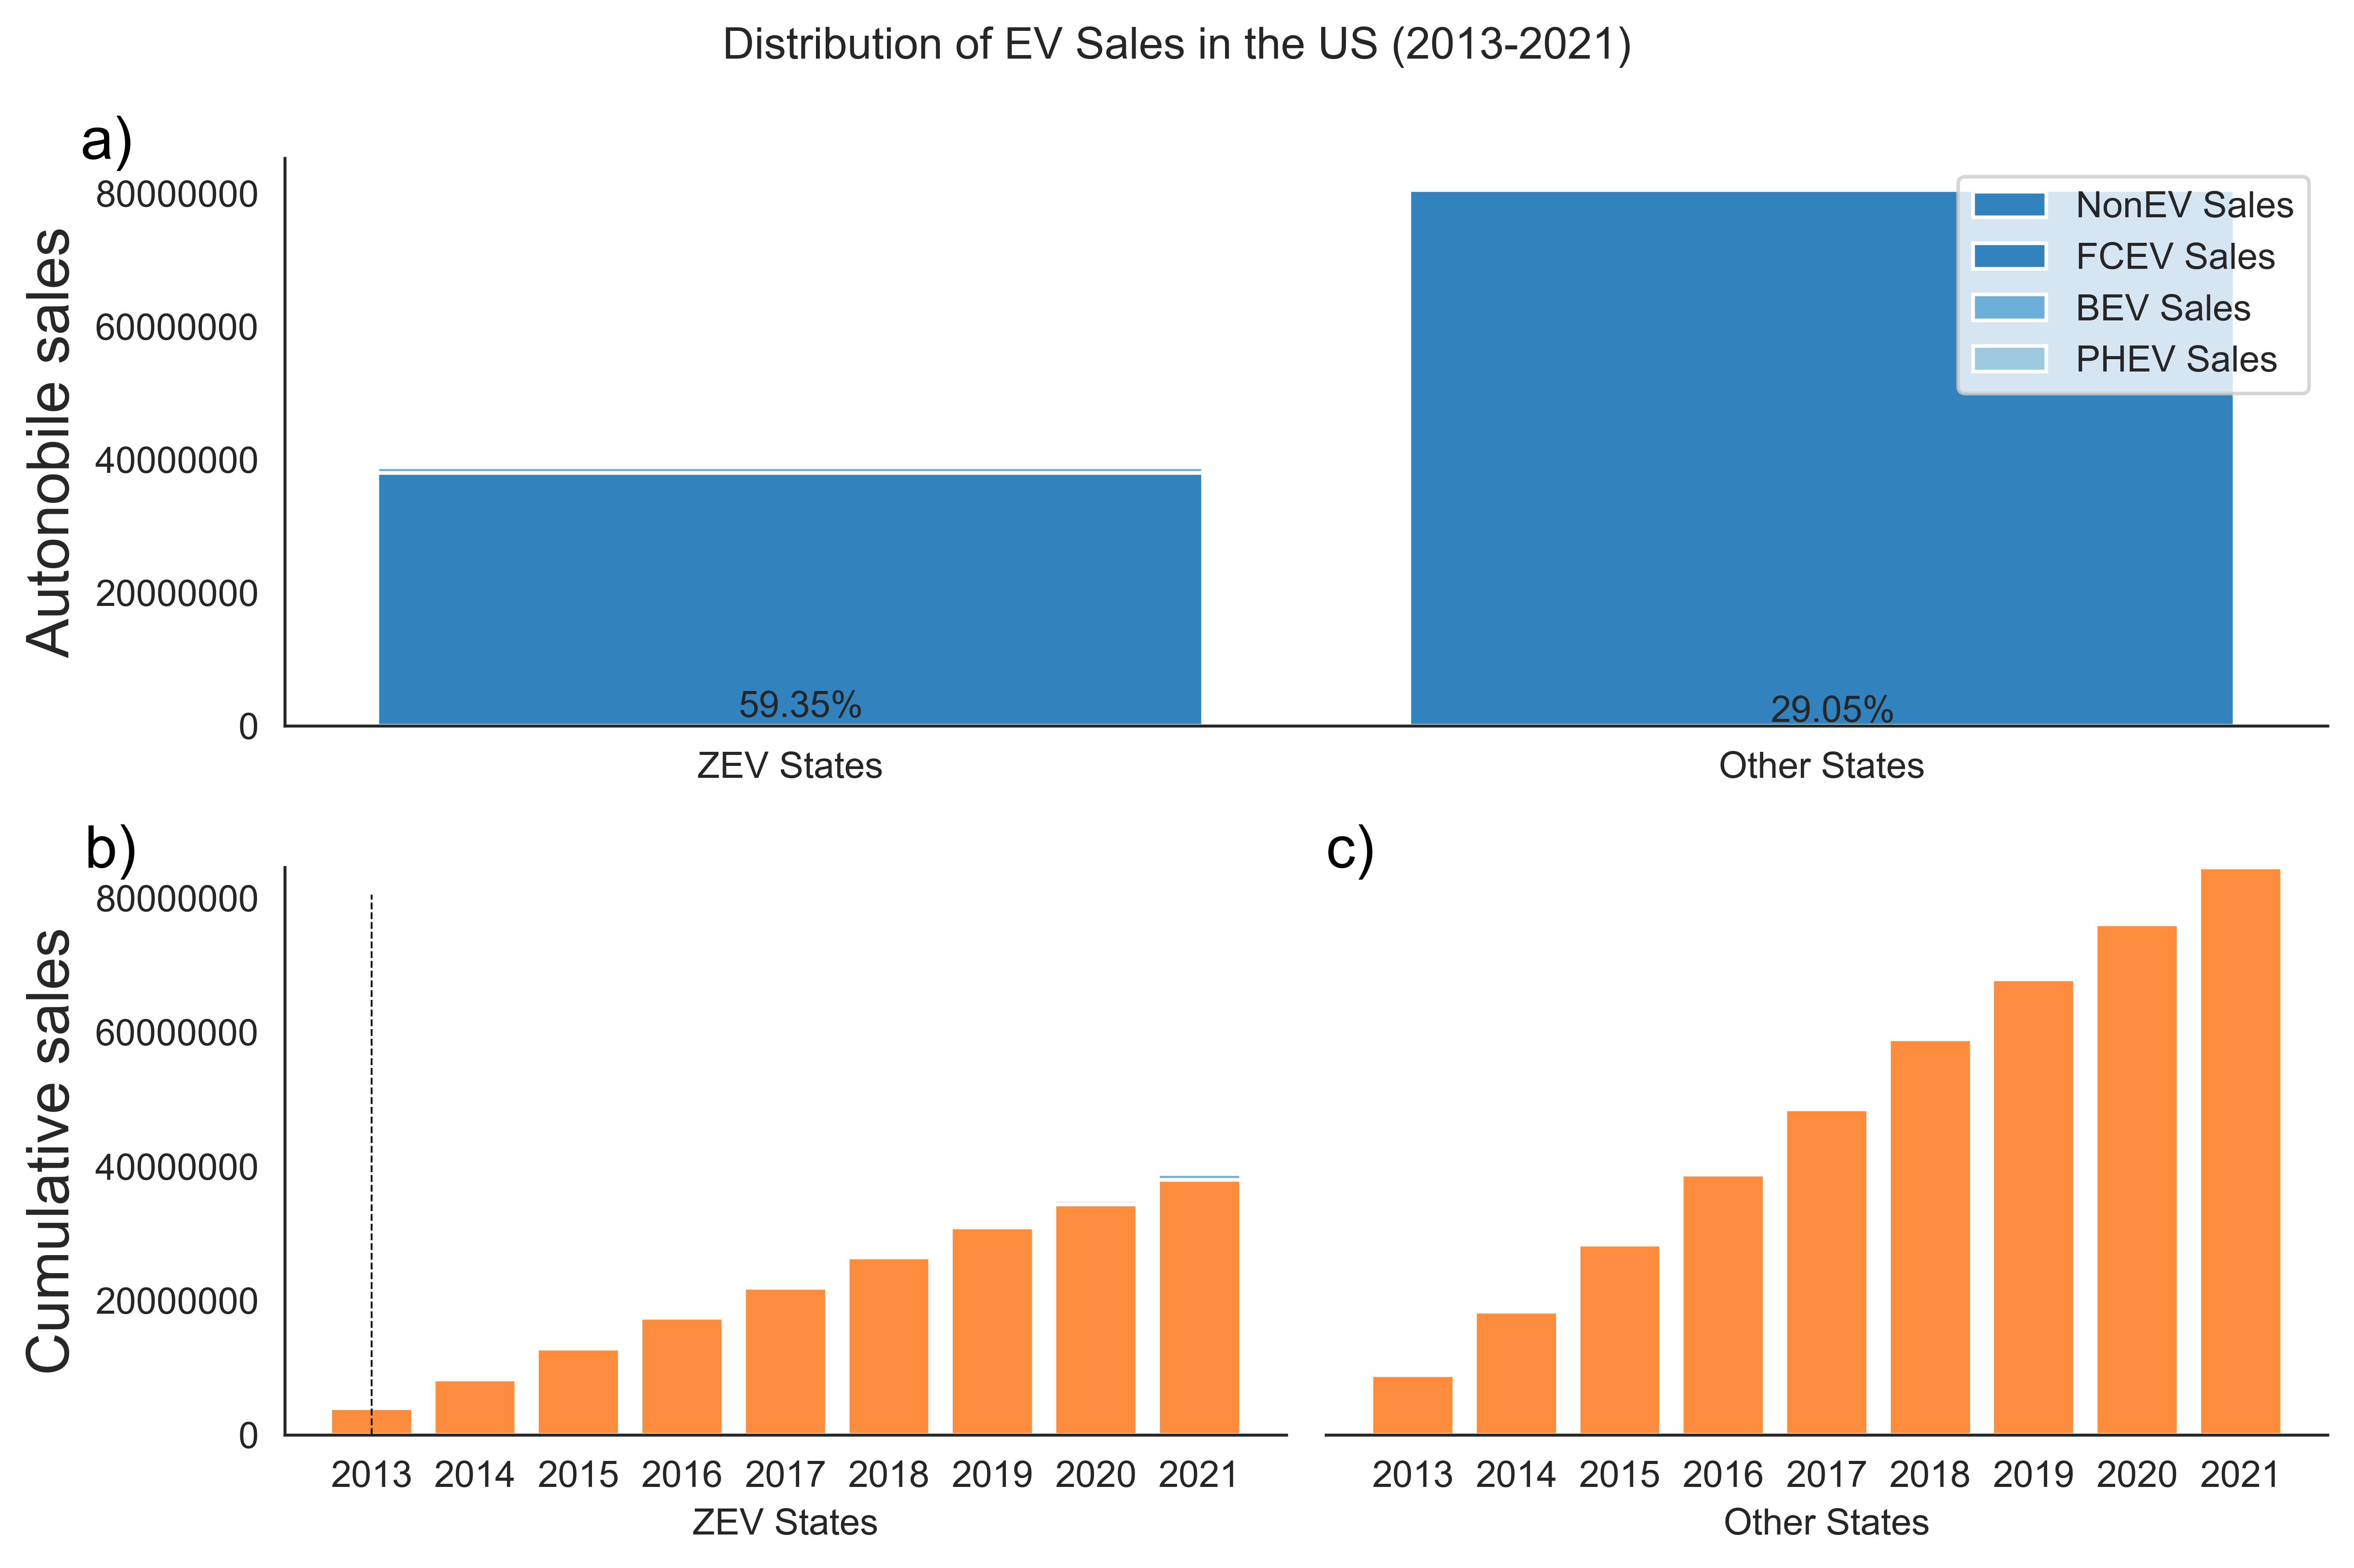

In [44]:
plt.rcParams.update({'font.size': 10})

sns.set_style('white')
cmap = plt.get_cmap('tab20c')

plt.figure(figsize=(9, 6), dpi=600)
gs = gridspec.GridSpec(2, 2)
#####

tmdf_carb = pd.read_csv("{}/{}_{}_{}.csv".format(OUTPUT_FILE, "carb_df_nonev_sales", start_year, end_year))
tmdf_noncarb = pd.read_csv("{}/{}_{}_{}.csv".format(OUTPUT_FILE, "noncarb_df_nonev_sales", start_year, end_year))

ax = plt.subplot(gs[0, :])
ax.text(-0.1, 1, "a)", transform=ax.transAxes, size=16, color='black')

label = ['ZEV States', 'Other States']
nonev_sales = [tmdf_carb['nonev_sales'].sum(), tmdf_noncarb['nonev_sales'].sum()]
fcev_sales = [tmdf_carb['FCEV Sales'].sum(), tmdf_noncarb['FCEV Sales'].sum()]
bev_sales = [tmdf_carb['BEV Sales'].sum(), tmdf_noncarb['BEV Sales'].sum()]
phev_sales = [tmdf_carb['PHEV Sales'].sum(), tmdf_noncarb['PHEV Sales'].sum()]
# y0 = nonev_sales[0] + nonev_sales[0] + nonev_sales[0]
y1 = fcev_sales[0] + bev_sales[0] + phev_sales[0]
y2 = fcev_sales[1] + bev_sales[1] + phev_sales[1]

ax.ticklabel_format(style='plain')

ax.text(-0.05, y1, "{:.2f}%".format(tmdf_carb['us_percent'].sum())) 
ax.text(0.95, y2, "{:.2f}%".format(tmdf_noncarb['us_percent'].sum())) 

plt.bar(label, nonev_sales, label = 'NonEV Sales', color = cmap(0))
plt.bar(label, fcev_sales, bottom = nonev_sales, label = 'FCEV Sales', color = cmap(0))
plt.bar(label, bev_sales, bottom = [i+j for i, j in zip(fcev_sales, nonev_sales)], label = 'BEV Sales', color = cmap(1))
plt.bar(label, phev_sales, bottom = [i+j+k for i, j, k in zip(fcev_sales, bev_sales, nonev_sales)], label='PHEV Sales', color = cmap(2))
plt.legend(loc='upper right')
plt.ylabel("Autonobile sales", size=16)
sns.despine()

######
ax = plt.subplot(gs[1, 0])
ax.text(-0.2, 1, "b)", transform=ax.transAxes, size=16, color='black')
ax.ticklabel_format(style='plain')

label = plot_df_carb['year'].tolist()
nonev_sales = np.cumsum(plot_df_carb['nonev_sales'].tolist())
fcev_sales = np.cumsum(plot_df_carb['FCEV Sales'].tolist())
bev_sales = np.cumsum(plot_df_carb['BEV Sales'].tolist())
phev_sales = np.cumsum(plot_df_carb['PHEV Sales'].tolist())

maxy = max(np.cumsum(plot_df_noncarb['nonev_sales']))

plt.bar(label, nonev_sales, color = cmap(5), label = 'NonEV Sales')
plt.bar(label, fcev_sales, bottom = nonev_sales, color = cmap(0), label = 'FCEV Sales')
plt.bar(label, bev_sales, bottom = [i+j for i, j in zip(fcev_sales, nonev_sales)], color = cmap(1), label = 'BEV Sales')
plt.bar(label, phev_sales, bottom = [i+j+k for i, j, k in zip(fcev_sales, bev_sales, nonev_sales)], color = cmap(2), label = 'PHEV Sales')

# plt.legend(loc='upper left')
plt.vlines(label.index('2013'), 0, maxy, linestyles='dashed', linewidth=0.5, color='k')
# plt.vlines(label.index('2018'), 0, maxy, linestyles='dashed', linewidth=0.5, color='k')
# plt.vlines(label.index('2019'), 0, maxy, linestyles='dashed', linewidth=0.5, color='k')
plt.xlabel('ZEV States')
plt.ylabel("Cumulative sales", size=16)
sns.despine()

#########
ax = plt.subplot(gs[1, 1])
ax.text(0, 1, "c)", transform=ax.transAxes, size=16, color='black')
ax.ticklabel_format(style='plain')

label = plot_df_carb['year'].tolist()
nonev_sales = np.cumsum(plot_df_noncarb['nonev_sales'].tolist())
fcev_sales = np.cumsum(plot_df_noncarb['FCEV Sales'].tolist())
bev_sales = np.cumsum(plot_df_noncarb['BEV Sales'].tolist())
phev_sales = np.cumsum(plot_df_noncarb['PHEV Sales'].tolist())

# maxy = max(np.cumsum(plot_df_noncarb['ev_sales']))

plt.bar(label, nonev_sales, color = cmap(5), label = 'NonEV Sales')
plt.bar(label, fcev_sales, bottom = nonev_sales, color = cmap(0), label = 'FCEV Sales')
plt.bar(label, bev_sales, bottom = [i+j for i, j in zip(fcev_sales, nonev_sales)], color = cmap(1), label = 'BEV Sales')
plt.bar(label, phev_sales, bottom = [i+j+k for i, j, k in zip(fcev_sales, bev_sales, nonev_sales)], color = cmap(2), label = 'PHEV Sales')

ax.get_yaxis().set_visible(False)
ax.get_yaxis().set_ticks([])
# plt.legend(loc='upper left')
# plt.ylabel("Electric vehicle sales", size=16)
sns.despine()
ax.spines['left'].set_visible(False)
plt.xlabel('Other States')

plt.ylim(0, maxy)
plt.suptitle("Distribution of EV Sales in the US ({}-{})".format(start_year, end_year-1))
plt.tight_layout()

plt.savefig("{}/{}_{}_{}_nonev.png".format(OUTPUT_IMAGE, "zev_sales", start_year, end_year), bbox_inches='tight')
plt.show()

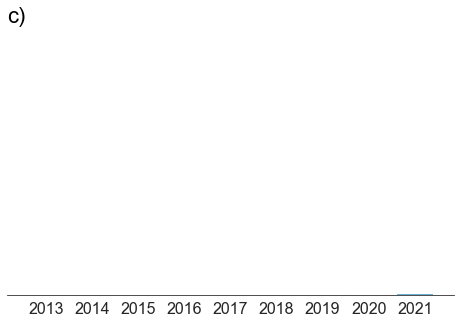

In [45]:
plt.rcParams.update({'font.size': 16})

sns.set_style('white')
cmap = plt.get_cmap('tab20c')

fig, ax = plt.subplots(figsize=(8,5))
ax.text(0, 1, "c)", transform=ax.transAxes, size=22, color='black')
ax.ticklabel_format(style='plain')

label = plot_df_carb['year'].tolist()
fcev_sales = np.cumsum(plot_df_noncarb['FCEV Sales'].tolist())
bev_sales = np.cumsum(plot_df_noncarb['BEV Sales'].tolist())
phev_sales = np.cumsum(plot_df_noncarb['PHEV Sales'].tolist())

# maxy = max(np.cumsum(plot_df_noncarb['ev_sales']))

plt.bar(label, fcev_sales, color = cmap(0), label = 'FCEV Sales')
plt.bar(label, bev_sales, bottom = fcev_sales, color = cmap(1), label = 'BEV Sales')
plt.bar(label, phev_sales, bottom = [i+j for i, j in zip(fcev_sales, bev_sales)], color = cmap(2), label = 'PHEV Sales')

ax.get_yaxis().set_visible(False)
ax.get_yaxis().set_ticks([])
# plt.legend(loc='upper left')
# plt.ylabel("Electric vehicle sales", size=16)
sns.despine()
ax.spines['left'].set_visible(False)

plt.ylim(0, maxy)
plt.savefig("{}/{}.png".format(OUTPUT_IMAGE, "zev_sales_c"), bbox_inches='tight')
plt.show()

In [16]:
epa_region[epa_region['State Code'].isin(EXCLUDE_STATES)]

,State Name,State Code,EPA Region
102,Arizona,4,9
250,Colorado,8,8
322,Delaware,10,3
325,District Of Columbia,11,3
1322,Minnesota,27,5
1805,New Mexico,35,6
2254,Pennsylvania,42,3
2966,Washington,53,10


In [17]:
epa_region[epa_region['State Name'] == 'Minnesota']

,State Name,State Code,EPA Region
1322,Minnesota,27,5


In [18]:
mdf_carb

,State,FCEV Sales,BEV Sales,PHEV Sales,year,State Name,State Code,EPA Region,ev_sales,us_percent
4,California,19,5062,1656,2011,California,6.0,9.0,6737,41.4891
6,Connecticut,0,8,103,2011,Connecticut,9.0,1.0,111,0.683582
19,Maine,0,0,17,2011,Maine,23.0,1.0,17,0.104693
20,Maryland,0,80,199,2011,Maryland,24.0,3.0,279,1.718192
21,Massachusetts,0,7,107,2011,Massachusetts,25.0,1.0,114,0.702057
...,...,...,...,...,...,...,...,...,...,...
550,New Jersey,0,19773,6219,2021,New Jersey,34.0,2.0,25992,160.068974
552,New York,0,21141,14366,2021,New York,36.0,2.0,35507,218.666092
557,Oregon,0,8380,4421,2021,Oregon,41.0,10.0,12801,78.8336
559,Rhode Island,0,944,737,2021,Rhode Island,44.0,1.0,1681,10.35226
